# 🗺️ Manually Adding WCS to an Astronomical Image

This tutorial demonstrates how to manually add World Coordinate System (WCS) information to an astronomical image using the `astropy.wcs` module, specifically for the case where you have already identified a star in the image that you would like to use as an "anchor" for the WCS. 

**Goal**: Transform a FITS image with only pixel coordinates into one with sky coordinates (RA/Dec) using a single stellar location as a known reference point. 

We will:
- Create a WCS object manually
- Add it to a FITS header
- Save and inspect the updated FITS file


# Imports
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

## 🔧 Step 1: Load a FITS Image
We'll generate a dummy 100x100 image for this example.

In [5]:
# Create a dummy image and write to FITS
image_data = np.random.normal(loc=1000, scale=100, size=(100, 100))
hdu = fits.PrimaryHDU(image_data)
hdul = fits.HDUList([hdu])
hdul.writeto("dummy_image.fits", overwrite=True)

## 🌌 Step 2: Define the WCS
We will define a simple TAN-projection WCS centered at a known RA/Dec.

In [8]:
w = WCS(naxis=2)
w.wcs.crpix = [50, 50]  # reference pixel
w.wcs.cdelt = np.array([-0.000277, 0.000277])  # pixel scale in deg/pixel
w.wcs.crval = [150.0, 2.0]  # RA, Dec at reference pixel
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]  # TAN projection

# Update the FITS header
header = hdu.header
header.update(w.to_header())
fits.writeto("dummy_image_with_wcs.fits", image_data, header, overwrite=True)

## 🖼️ Step 3: Visualize with WCS Axes
We can now plot the image using sky coordinates on the axes.

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


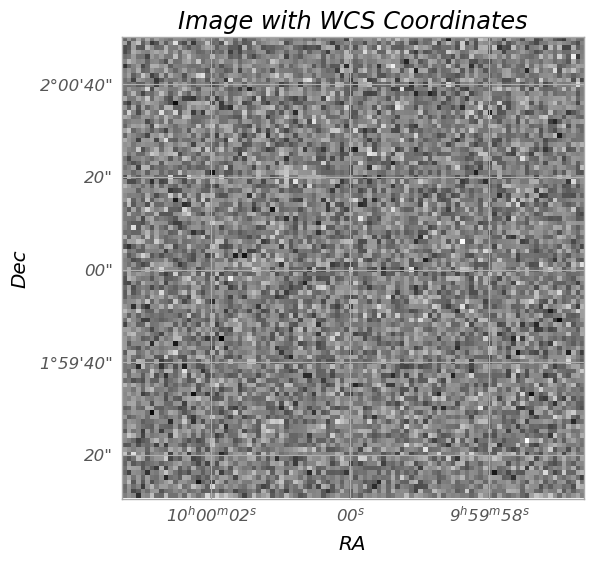

In [11]:
# Reload and plot the WCS-tagged FITS file
with fits.open("dummy_image_with_wcs.fits") as hdul:
    wcs = WCS(hdul[0].header)
    data = hdul[0].data

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(projection=wcs)
ax.imshow(data, origin='lower', cmap='gray')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
plt.title('Image with WCS Coordinates')
plt.show()